In [ ]:
import kagglehub
import os
import pandas as pd


# Download latest version--------------------------------------------------------------------------
path = kagglehub.dataset_download("bharatnatrayn/movies-dataset-for-feature-extracion-prediction")
files = os.listdir(path)
csv_path = os.path.join(path, "movies.csv")
#--------------------------------------------------------------------------------------------------

df = pd.read_csv(csv_path)

# Count rows
num_rows = len(df)
print(f"Number of rows before cleaning: {num_rows}")


Number of rows before cleaning: 9999


**1. Data Exploration**

   1. This stage focuses on understanding the dataset to identify its structure, key features, and any initial problems.
   
   2. Identify trends or patterns in the data

   3. Look for missing values, unusual data points, or columns that seem irrelevant.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB
None
Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')
MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64
431


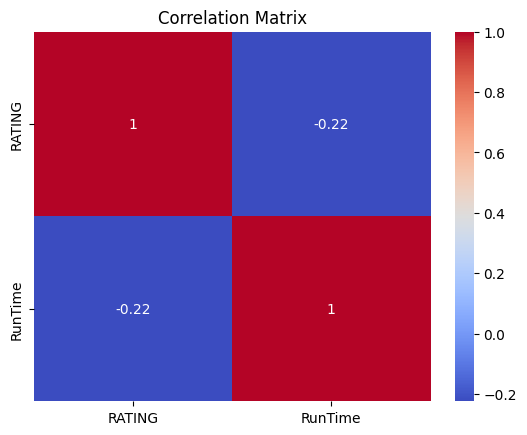

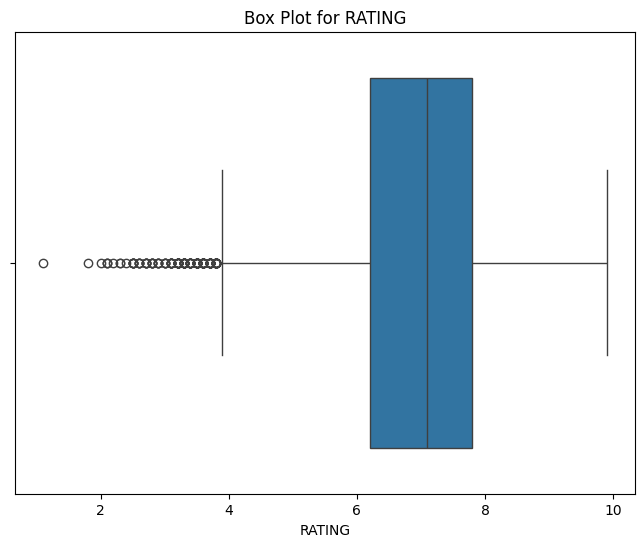

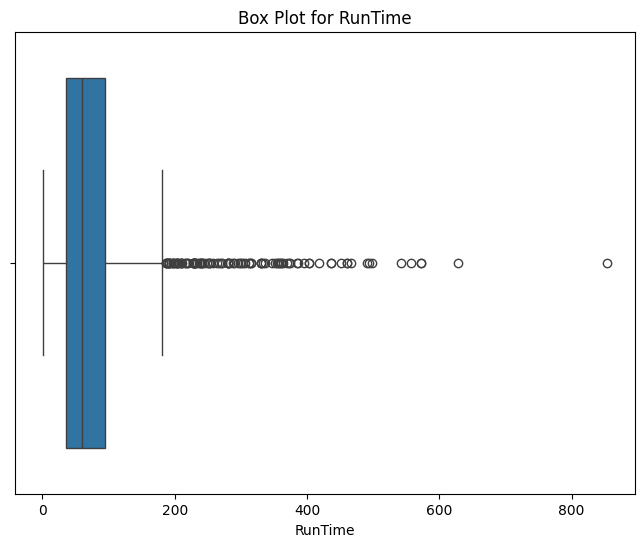

Missing Values per Column:
MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64


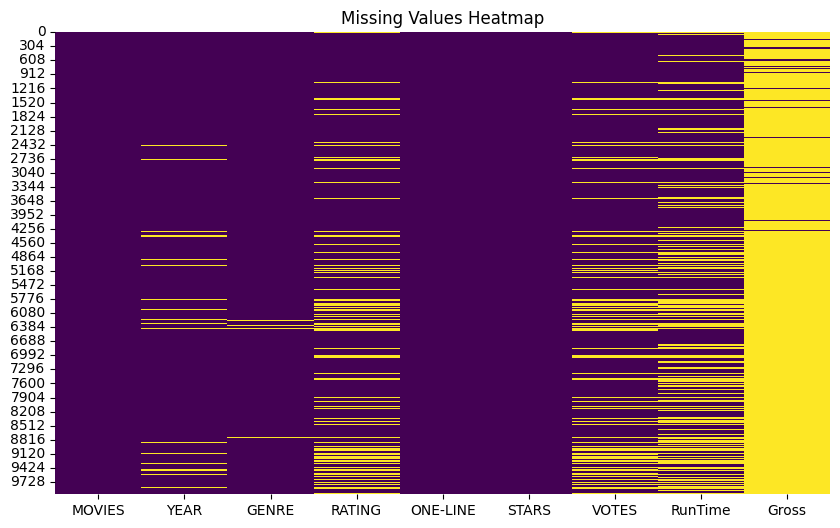

In [ ]:
import pandas as pd
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt



# Download latest version--------------------------------------------------------------------------
path = kagglehub.dataset_download("bharatnatrayn/movies-dataset-for-feature-extracion-prediction")
files = os.listdir(path)
csv_path = os.path.join(path, "movies.csv")
#--------------------------------------------------------------------------------------------------

df = pd.read_csv(csv_path)

print(df.info())          # Get data types and missing values
print(df.columns)         # View all column names
print(df.isnull().sum())  # Check for missing values
print(df.duplicated().sum())  # Check for duplicate



# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Plot box plots for all numeric columns to check for outliers
numeric_columns = df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f"Box Plot for {column}")
    plt.show()

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

**2. Data Cleaning**

The goal here is to prepare the dataset by handling common data quality issues.


1.   Handle Missing Values
2.   Detect and Remove Duplicates
3.   Handle Outliers
4.   Resolve Inconsistencies



In [ ]:
import kagglehub
import os
import pandas as pd


# Download latest version--------------------------------------------------------------------------
path = kagglehub.dataset_download("bharatnatrayn/movies-dataset-for-feature-extracion-prediction")
files = os.listdir(path)
csv_path = os.path.join(path, "movies.csv")
#--------------------------------------------------------------------------------------------------

df = pd.read_csv(csv_path)

print("BEFORE handling missing values\n",df.isnull().sum())  # Count missing values per column Before Cleaning


df['RATING'].fillna(df['RATING'].mean(), inplace=True)
df['GENRE'].fillna(df['GENRE'].mode()[0], inplace=True)
df['YEAR'].fillna(df['YEAR'].mode()[0], inplace=True)
df['STARS'].fillna(df['STARS'].mode()[0], inplace=True)
df['VOTES'].fillna(df['VOTES'].mode()[0], inplace=True)
df['RunTime'].fillna(df['RunTime'].mode()[0], inplace=True)
df['Gross'].fillna(df['Gross'].mode()[0], inplace=True)

print("\n\n\nAFTER handling missing values\n",df.isnull().sum())  # Count missing values per column After Cleaning


print("BEFORE droping the duplicates : ",df.duplicated().sum())  # Count duplicate rows BEFORE

df = df.drop_duplicates()    # Remove duplicates

print("\nAFTER droping the duplicates : ",df.duplicated().sum())  # Count duplicate rows AFTER



# Calculate IQR for each numeric column and identify outliers
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Outliers in {column}:")
    print(outliers)


df['YEAR'] = df['YEAR'].str.lower()
df['GENRE'] = df['GENRE'].str.lower()
df['STARS'] = df['STARS'].str.lower()
df['Gross'] = df['Gross'].str.lower()



BEFORE handling missing values
 MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64



AFTER handling missing values
 MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
Gross       0
dtype: int64
BEFORE droping the duplicates :  431

AFTER droping the duplicates :  0
Outliers in RATING:
                            MOVIES         YEAR  \
16                    Breaking Bad  (2008–2013)   
56                         365 dni       (2020)   
170                  Hostage House       (2021)   
185              Too Hot to Handle     (2020– )   
416                       Vanquish       (2021)   
...                            ...          ...   
9376               Surviving Death     (2021– )   
9610   Formula 1: Drive to Survive     (2019– )   
9891                        Dexter  (2006–2013)   
9892                       

<ipython-input-110-78671f767f2f>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RATING'].fillna(df['RATING'].mean(), inplace=True)
<ipython-input-110-78671f767f2f>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

**3. Data Analysis**




Number of rows after cleaning: 9568
                  MOVIES      YEAR                 GENRE       RATING  \
count               9568      9568                  9568  9568.000000   
unique              6817       438                   510          NaN   
top      Bleach: Burîchi  (2020– )  \nComedy                      NaN   
freq                  65      1418                   915          NaN   
mean                 NaN       NaN                   NaN     6.919915   
std                  NaN       NaN                   NaN     1.127178   
min                  NaN       NaN                   NaN     1.100000   
25%                  NaN       NaN                   NaN     6.400000   
50%                  NaN       NaN                   NaN     6.921176   
75%                  NaN       NaN                   NaN     7.600000   
max                  NaN       NaN                   NaN     9.900000   

              ONE-LINE STARS VOTES      RunTime   Gross  
count             9568  9568 

<ipython-input-109-bce1a243ba72>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RATING'].fillna(df['RATING'].mean(), inplace=True)
<ipython-input-109-bce1a243ba72>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

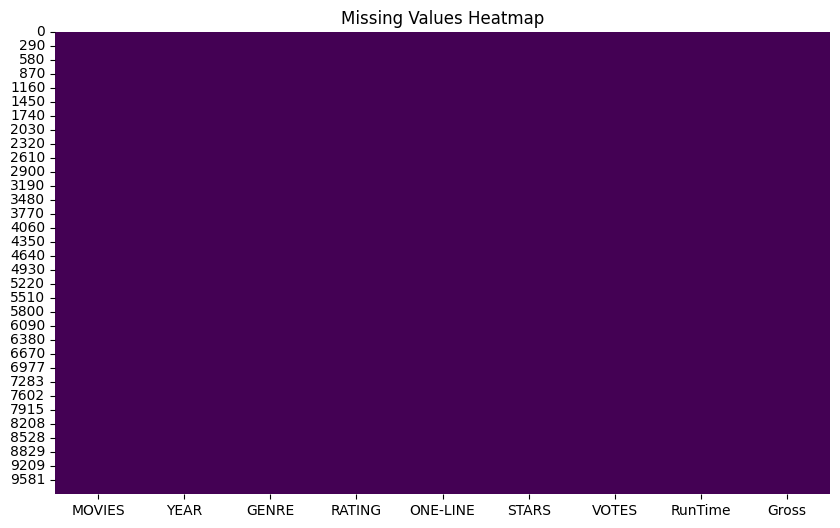

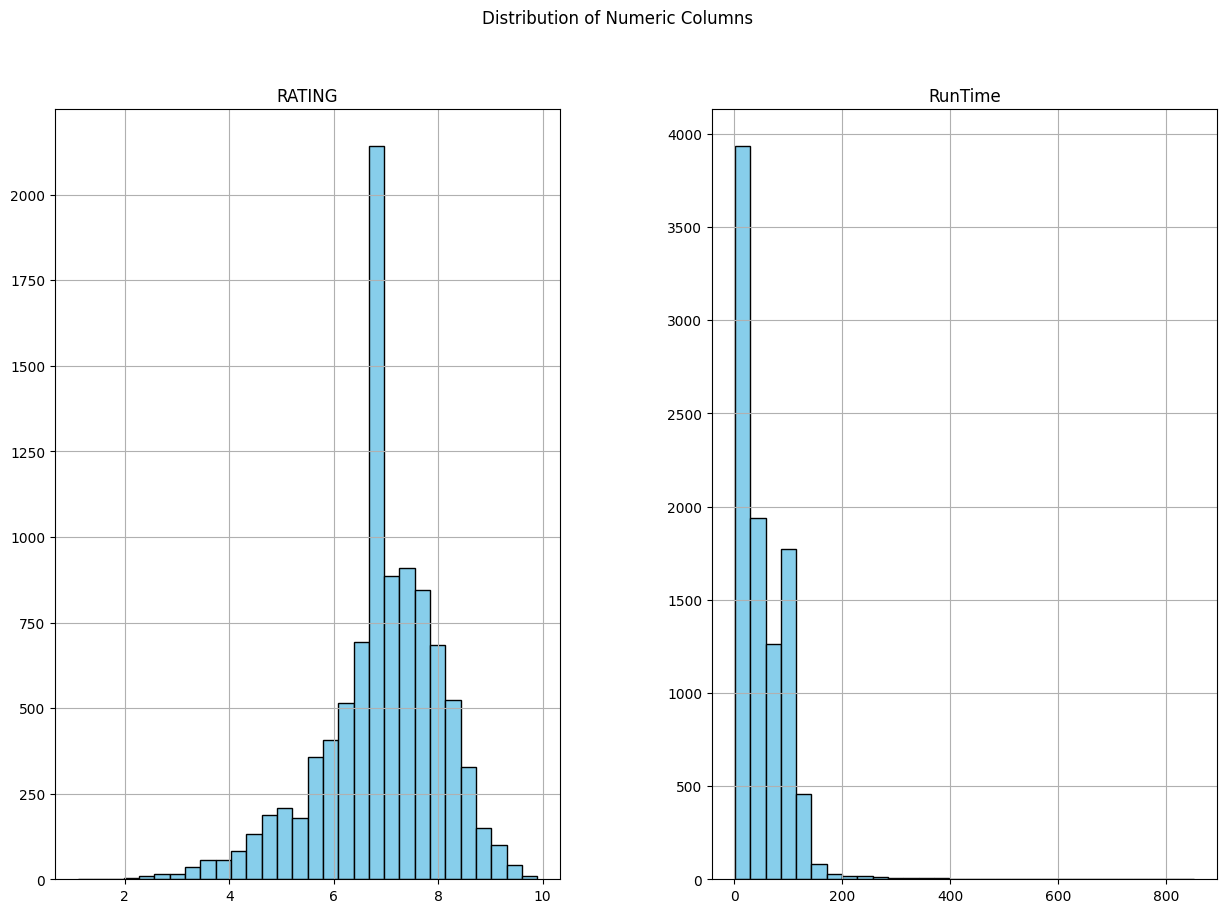

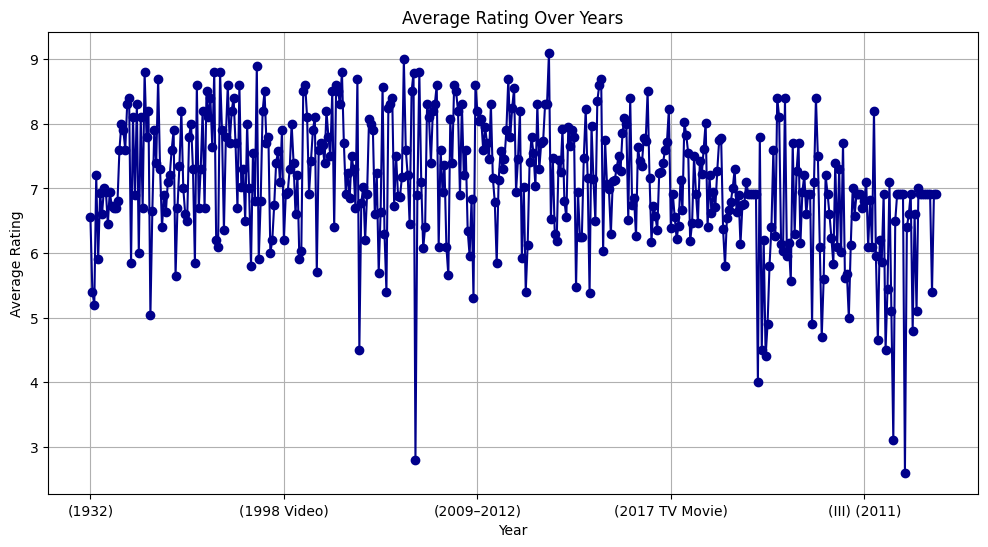

In [ ]:
import kagglehub
import os
import pandas as pd


# Download latest version--------------------------------------------------------------------------
path = kagglehub.dataset_download("bharatnatrayn/movies-dataset-for-feature-extracion-prediction")
files = os.listdir(path)
csv_path = os.path.join(path, "movies.csv")
#--------------------------------------------------------------------------------------------------
df = pd.read_csv(csv_path)
df['RATING'].fillna(df['RATING'].mean(), inplace=True)
df['GENRE'].fillna(df['GENRE'].mode()[0], inplace=True)
df['YEAR'].fillna(df['YEAR'].mode()[0], inplace=True)
df['STARS'].fillna(df['STARS'].mode()[0], inplace=True)
df['VOTES'].fillna(df['VOTES'].mode()[0], inplace=True)
df['RunTime'].fillna(df['RunTime'].mode()[0], inplace=True)
df['Gross'].fillna(df['Gross'].mode()[0], inplace=True)
df = df.drop_duplicates()    # Remove duplicates

# Count rows
num_rows = len(df)
print(f"Number of rows after cleaning: {num_rows}")

df.groupby('YEAR')['RunTime'].mean()

# General summary of the dataset
print(df.describe(include="all"))  # Include all columns, including categorical ones

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()



# Plot histograms for numeric columns
numeric_columns = df.select_dtypes(include=["number"]).columns

df[numeric_columns].hist(bins=30, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numeric Columns")
plt.show()


# Average Rating by Year
rating_by_year = df.groupby("YEAR")["RATING"].mean()

plt.figure(figsize=(12, 6))
rating_by_year.plot(kind="line", marker="o", color="darkblue")
plt.title("Average Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()




